# Font Classifier using FastAI

In [1]:
import fastai
from fastai import *          # Quick access to most common functionality
from fastai.vision import *   # Quick access to computer vision functionality

In [2]:
PATH = "/home/paperspace/data/"
sz=225
arch=tvm.resnet50
bs=28

raleway


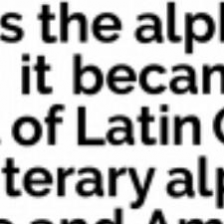

In [28]:
data = image_data_from_folder(PATH, ds_tfms=get_transforms(), tfms=imagenet_norm, size=224)
img,label = data.valid_ds[-350]
print(data.classes[label])
img

In [4]:
data.classes

['lato',
 'merriweather',
 'montserrat',
 'open-sans',
 'oswald',
 'raleway',
 'roboto']

In [5]:
data.device

device(type='cuda')

In [6]:
from torch.cuda import get_device_name

In [7]:
torch.cuda.current_device()

0

In [8]:
learn = ConvLearner(data, tvm.resnet50, metrics=accuracy)
learn.fit_one_cycle(1)

Total time: 01:40
epoch  train loss  valid loss  accuracy
0      1.337138    0.897778    0.661247  (01:40)



In [9]:
learn.unfreeze()
learn.fit_one_cycle(6, slice(1e-5,3e-4), pct_start=0.05)

Total time: 11:43
epoch  train loss  valid loss  accuracy
0      0.870651    0.525902    0.814363  (02:00)
1      0.605632    0.367807    0.865854  (01:56)
2      0.432556    0.252608    0.907859  (01:56)
3      0.326773    0.222778    0.921409  (01:56)
4      0.270976    0.185739    0.936314  (01:56)
5      0.242045    0.184467    0.934959  (01:57)



In [10]:
learn.save('224_all_50')

In [11]:
learn.load('224_all_50')

In [12]:
data.classes

['lato',
 'merriweather',
 'montserrat',
 'open-sans',
 'oswald',
 'raleway',
 'roboto']

## Analyzing results

In [13]:
import numpy as np

In [14]:
log_preds,y = learn.TTA()


Total time: 01:24



In [15]:
log_preds.shape

torch.Size([1476, 7])

In [16]:
np_log_preds = np.array(log_preds)

In [17]:
np_log_preds.shape

(1476, 7)

In [18]:
preds = np.argmax(np.exp(np_log_preds), axis=1)

In [19]:
preds.shape

(1476,)

In [20]:
preds

array([2, 0, 2, ..., 6, 2, 6])

In [21]:
y.shape

torch.Size([1476])

In [22]:
# !conda install --yes scikit-learn

In [23]:
from sklearn.metrics import confusion_matrix

In [24]:
cm = confusion_matrix(y, preds)

In [25]:
def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues, figsize=None):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    (This function is copied from the scikit docs.)
    """
    plt.figure(figsize=figsize)
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize: cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    print(cm)
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j], horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

[[188   0  17   2   0   7   2]
 [  0  94   0   0   0   0   2]
 [  0   0 426   1   0   5   0]
 [  6   0   7 104   0   2   1]
 [  0   0   0   1 175   0   4]
 [  0   0  23   1   0 192   0]
 [  7   0   7   3   1   3 195]]


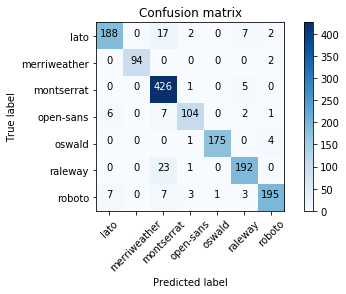

In [26]:
plot_confusion_matrix(cm, data.classes)